## Task #1: Installation


In [1]:
# install nltk
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# install gensim
!pip install gensim


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


## Task #2: load the data


In [44]:
resume_df = pd.read_csv("resume.csv", encoding = "latin-1")
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [45]:
# data containing resume
resume_df = resume_df[['resume_text', 'class'  ]]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [48]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [49]:
# check for null values
resume_df.isnull().sum()

resume_text    0
class          0
dtype: int64

In [50]:
#this is unbalanced as the number of not_flagged are more than number of flagged.
resume_df['class'].value_counts() 

not_flagged    92
flagged        33
Name: class, dtype: int64

In [51]:
#converting the categorical label into numerical (0 or 1)
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [55]:
class_0_df = resume_df['class']==0
class_0_df

0       True
1       True
2       True
3       True
4      False
       ...  
120     True
121     True
122     True
123    False
124     True
Name: class, Length: 125, dtype: bool

In [57]:
class_0_df = resume_df[resume_df['class'] == 0]
class_0_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
...,...,...
119,Professional\rNewbury VT - Email me on Indeed:...,0
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0


In [59]:
class_1_df = resume_df['class']==1
class_1_df

0      False
1      False
2      False
3      False
4       True
       ...  
120    False
121    False
122    False
123     True
124    False
Name: class, Length: 125, dtype: bool

In [60]:
class_1_df = resume_df[resume_df['class'] == 1]
class_1_df

,resume_text,class
4,\rIndependent Consultant - Self-employed\rBurl...,1
7,Statistician\rBurlington VT - Email me on Inde...,1
10,Barbara Kurth\rResearch Assistant Professor Cl...,1
15,Caroline Clauson Work Study Student\rBrattlebo...,1
17,Chelsea Martin\rEnvironmental Scientist - Vana...,1
18,Christopher Fusting Data Science Consultant\rB...,1
23,David Grass\rCity Research Scientist - Environ...,1
24,David Lucero Public Health Analyst\rBurlington...,1
27,Drew Burkhard\rEnvironmental Scientist Meets M...,1
31,Eric Anderson Data Scientist\rBrattleboro VT -...,1


In [63]:
resume_df["class"].value_counts() #we have inbalanced data.

0    92
1    33
Name: class, dtype: int64

# TASK #4: PERFORM DATA CLEANING

In [64]:
#removing the /r from the data in the resume_text column
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace("\r", ""))
resume_df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [65]:
# download nltk packages
#punkt is a pretrained model whih helps in splitting the words and sentences.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [66]:
# download nltk packages
#stopwords are common english words which do not add any extra value to our ml model.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [70]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english') #getting all the stopwords.
stop_words.extend(['from', 'subject', 're', 'use', 'email', 'com']) #adding more words to the useless words list from the nltk

In [74]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [75]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [79]:
resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [77]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [50]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

# TASK #5: VISUALIZE CLEANED DATASET

<AxesSubplot: xlabel='class', ylabel='count'>

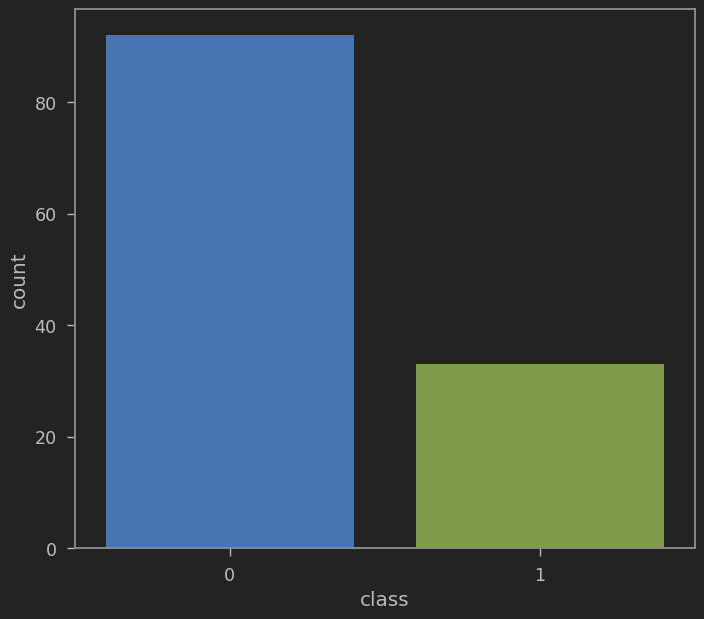

In [85]:
# Plot the counts of flagged vs not flagged
sns.countplot(x='class', data=resume_df)


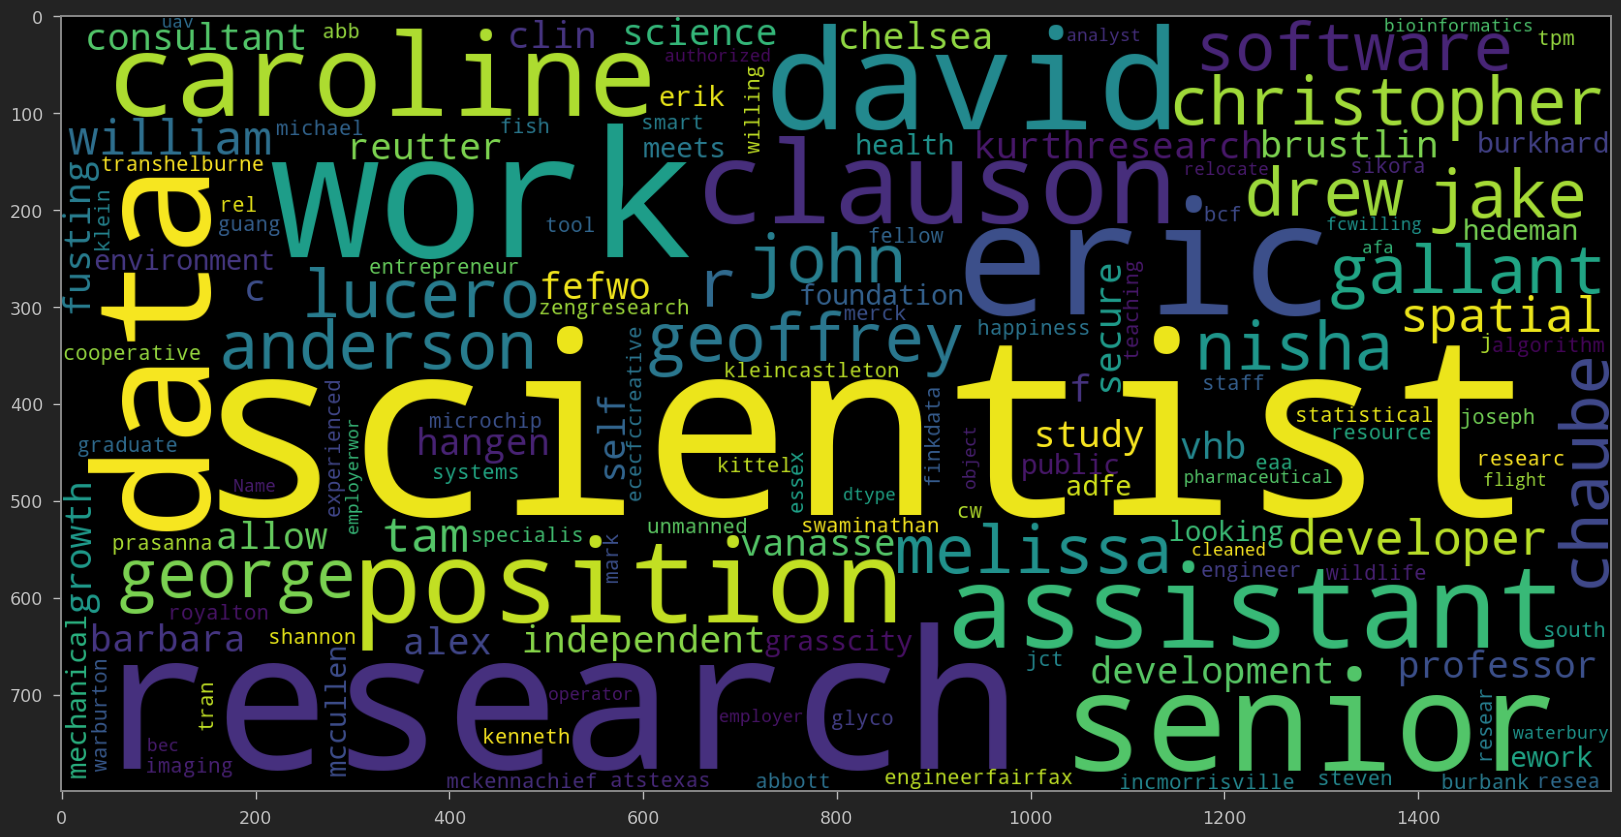

In [94]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words=2000, width = 1600, height = 800, stopwords =stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)


MINI CHALLENGE #3:
- Plot the wordcloud for class #1 

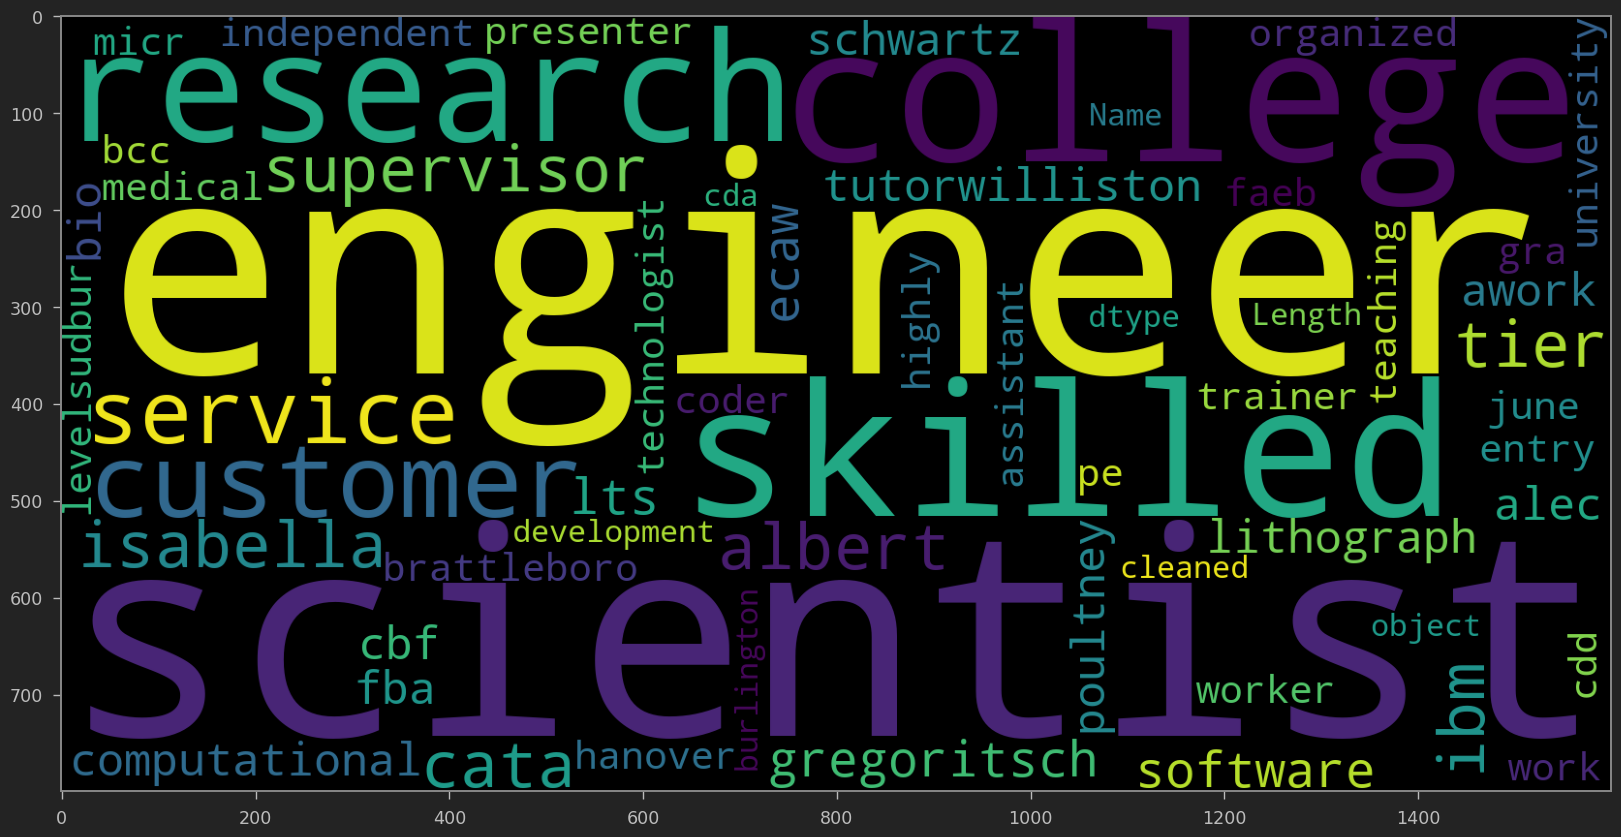

In [95]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words=2000, width = 1600, height = 800, stopwords =stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)


# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

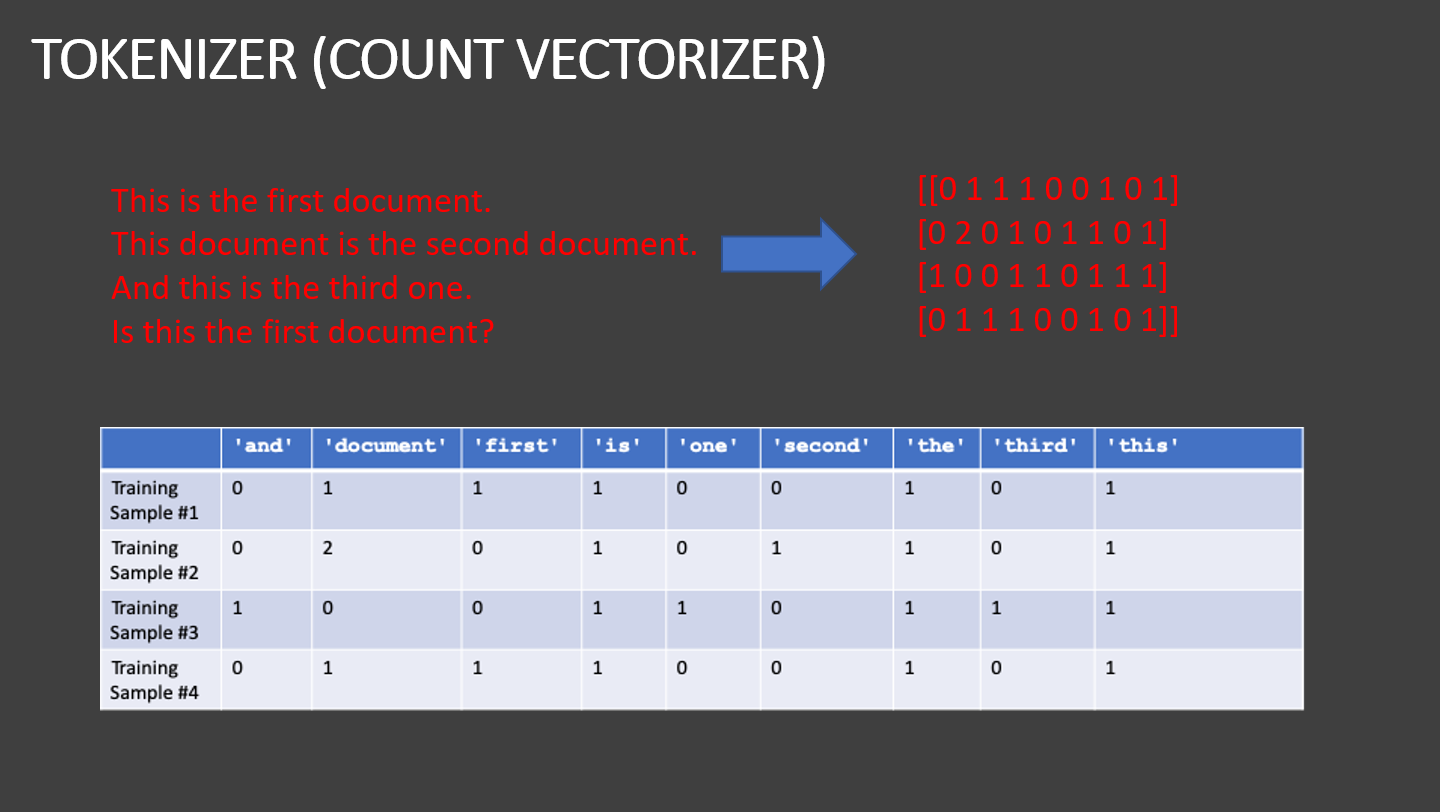

In [103]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [104]:
print(vectorizer.get_feature_names_out())  

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [105]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [112]:
# Applying CountVectorier to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

In [113]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [114]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
prob = ((20/60) * (3/20))   /    (4/60)    = 0.75

# TASK#7: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [115]:
countvectorizer

<125x11315 sparse matrix of type '<class 'numpy.int64'>'
	with 35690 stored elements in Compressed Sparse Row format>

In [116]:
x = countvectorizer

In [117]:
y = resume_df['class']

In [118]:
x.shape

(125, 11315)

In [119]:
y.shape

(125,)

In [150]:
#splitting the dataset into training and testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [151]:
x_test.shape

(25, 11315)

In [152]:
x_train.shape

(100, 11315)

In [153]:
from sklearn.naive_bayes import MultinomialNB
MB_classifier = MultinomialNB()
MB_classifier.fit(x_train, y_train)

MultinomialNB()

MINI CHALLENGE #5:
- Split the data into 25% testing and 75% training and perform a sanity check



In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [169]:
from sklearn.naive_bayes import MultinomialNB
MB_classifier = MultinomialNB()
MB_classifier.fit(x_train, y_train)

MultinomialNB()

In [170]:
x_test.shape

(32, 11315)

In [171]:
x_train.shape

(93, 11315)

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


In [164]:
from sklearn.naive_bayes import MultinomialNB

# Initialize classifier
NB_classifier = MultinomialNB()

# Fit it on training data
NB_classifier.fit(x_train, y_train)

MultinomialNB()

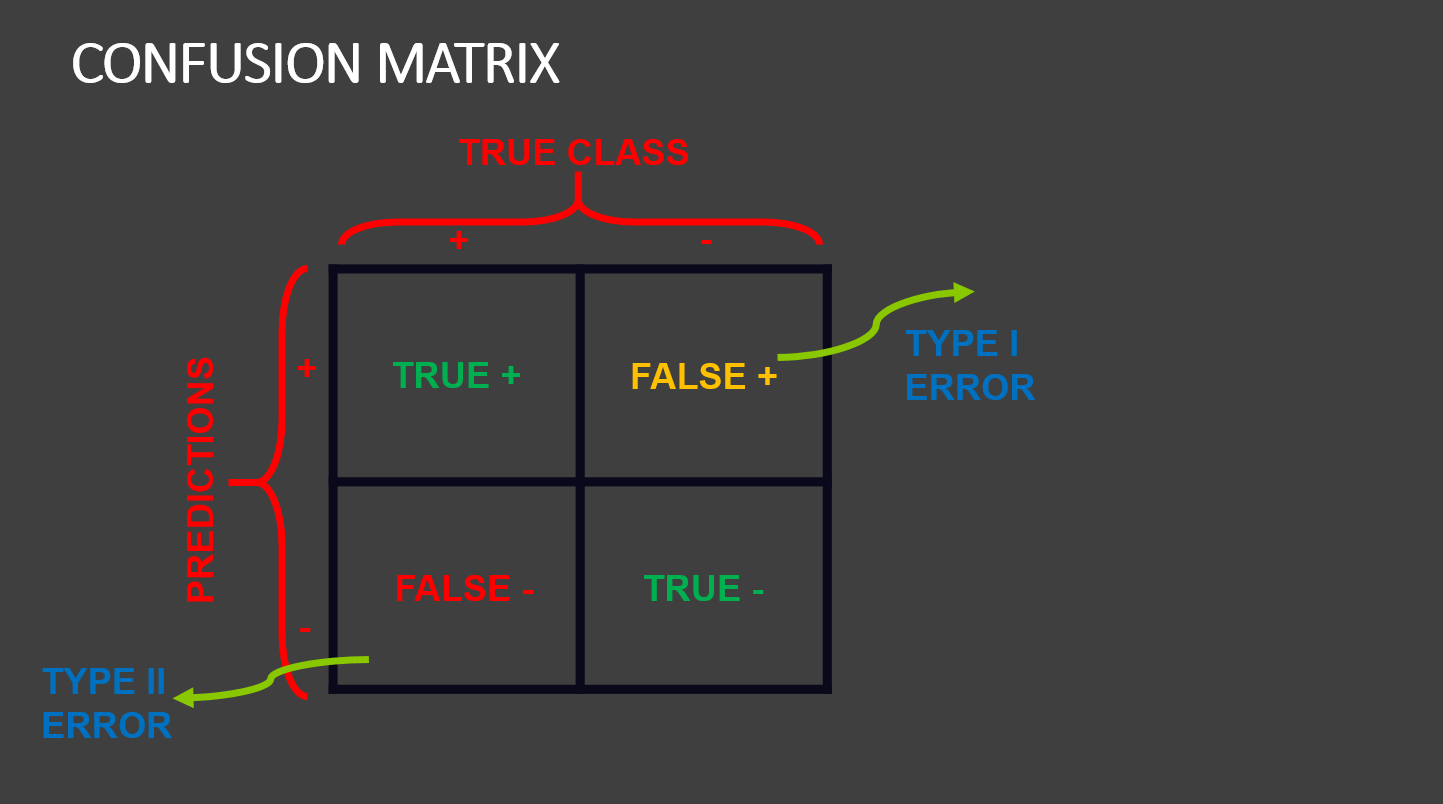

<AxesSubplot: >

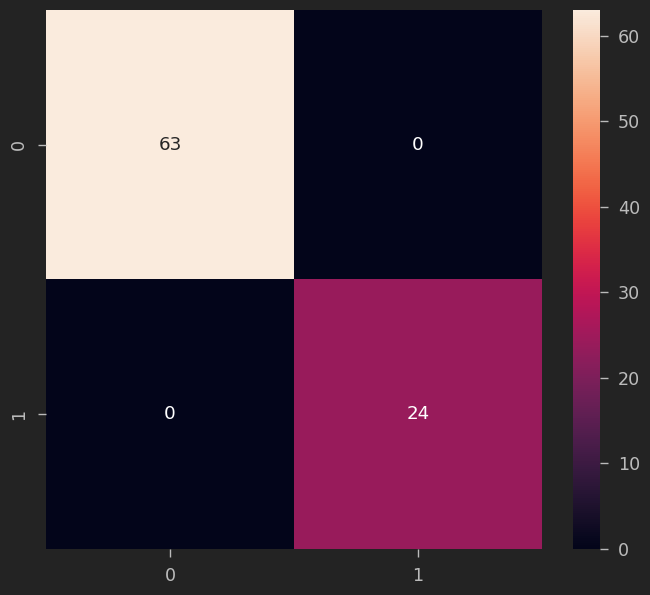

In [165]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot: >

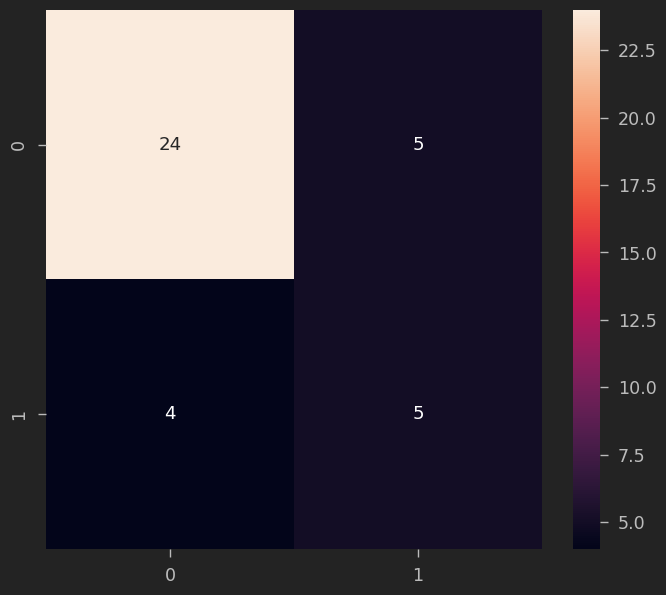

In [166]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [167]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.50      0.56      0.53         9

    accuracy                           0.76        38
   macro avg       0.68      0.69      0.68        38
weighted avg       0.77      0.76      0.77        38



MINI CHALLENGE #6:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


In [184]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [185]:
from sklearn.naive_bayes import MultinomialNB
MB_classifier = MultinomialNB()
MB_classifier.fit(x_train, y_train)

MultinomialNB()

In [186]:
x_test.shape

(38, 11315)

In [187]:
x_train.shape

(87, 11315)

<AxesSubplot: >

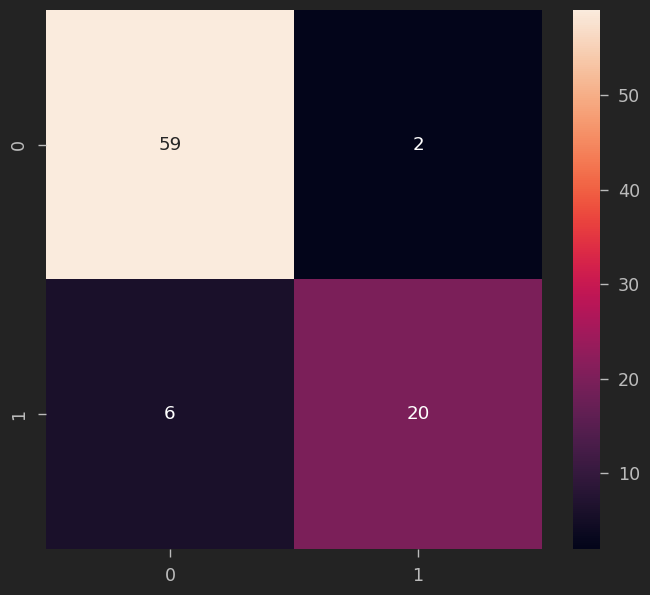

In [188]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot: >

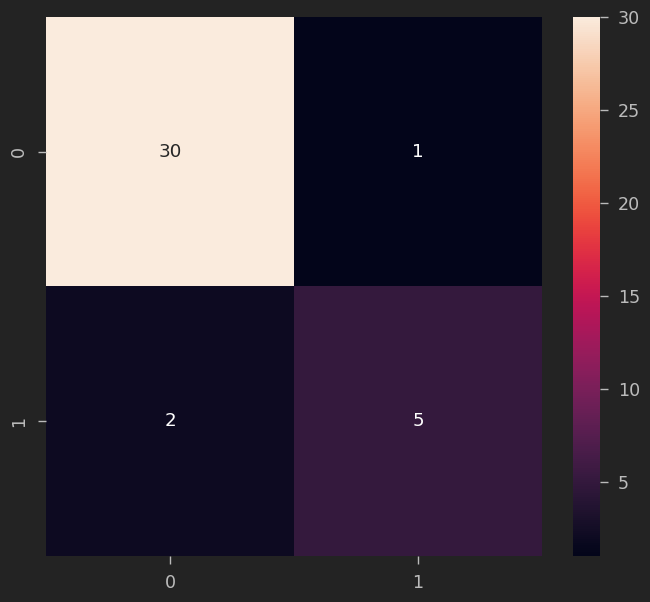

In [189]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [190]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.83      0.71      0.77         7

    accuracy                           0.92        38
   macro avg       0.89      0.84      0.86        38
weighted avg       0.92      0.92      0.92        38

